# Tarea1 - Proyecto de Aprendizaje Supervisado
## Maestría en Ciencia de Datos - Gestión Estratégica
- Daniel Martinez
- Felipe Montenegro
- Alejandra Ruiz
- Juan Vergara

## 1. Librerías básicas a utilizar

- Pandas: para el análisis de datos a través de dataframes (data tabular)
- Numpy: para todo lo relacionado con manipulación de arreglos y análisis numérico
- Seaborn y matplotlib.pyplot: para visualización de datos

In [1]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

# Librería para el manejo de expresiones regulares
import re

import warnings
warnings.filterwarnings("ignore")

## 2. Lectura de los datos

- El primer paso es la Lectura del archivo csv a un dataframe de pandas
- Se trata de una tarea de regresión ya que la variable objetivo es la esperanza de vida (tipo continua)


In [2]:

df = pd.read_csv('university_admission.csv')
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
print(df["University_Rating"].unique())
print(df["Research"].unique())
print(df["SOP"].unique())
print(df["LOR"].unique())


[4 3 2 5 1]
[1 0]
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]


Al hacer el llamado al dataframe, podemos dar un primer vistazo al conjunto de datos. 

## 3. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 3.1. Limpieza de datos

Para realizar una apropiada limpieza de datos se deben entender cada una de las variables presentes dentro del conjunto de datos.

Elementos a tener en cuenta:
- El significado y tipo (e.g. nominal/ordinal/intervalo/ratio) de cada una de las variables
- Identificación de valores faltantes y en caso de haberlos plantear las opciones para tratarlos
- Presencia de datos atípicos y en caso de haberlos identificar la manera de tratarlos


In [4]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

**Descripciones de variables**

| Columna | Descripción | Tipo | Rango / No. Categorías |
|:-----:|:-----:|:-----:|:-----:|
| GRE_Score | Puntaje del GRE | Cuantitativa Discreta | Rango: [290 - 340] |
| TOEFL_Score | Puntaje del TOEFL |Cuantitativa Discreta | Rango: [92 - 120] |
| University_Rating | Calificación de la Universidad | Cualitativa Ordinal | Categorías: 5 |
| SOP | Statement of Purpose | Cuantitativa Continua | Rango: [1.0 - 5.0] |
| LOR | Carta de Recomendación | Cuantitativa Continua | Rango: [1.0 - 5.0] |
| CGPA | Promedio Acumulado  | Cuantitativa Continua | Rango: [6.8 - 9.92]|
| Research | Investiga| Binaria | [1 y 0] |
| Chance_of_Admission | Posibilidad de admisión | Cuantiativa Continua | Rango: [0.34 - 0.97]  |

### Valores faltantes

- Detección de valores faltantes
- Manejo de valores faltantes

### ¿Qué podemos hacer con estos?

- Identificar valores faltantes (no necesariamente representados por null)
- Imputarlos
- Eliminarlos (registros o columnas)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [6]:
df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

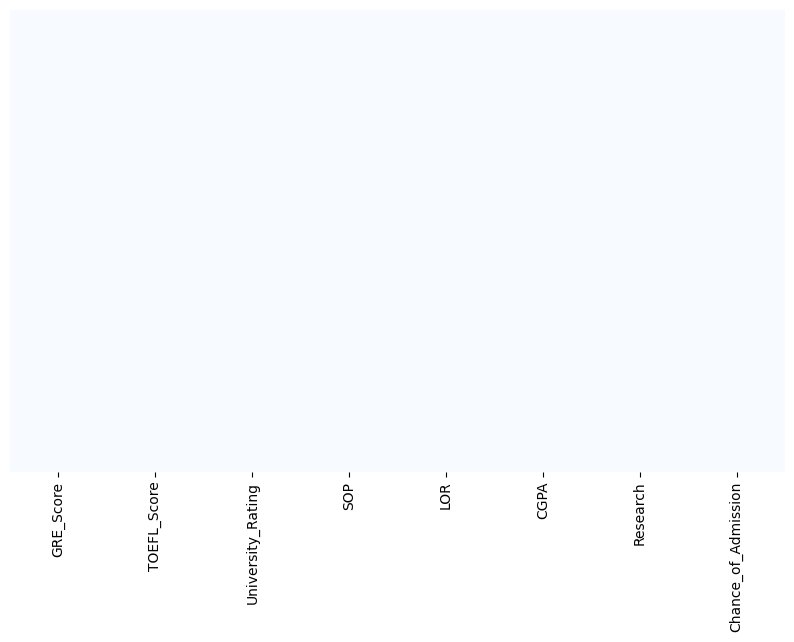

In [7]:
# Para revisar datos faltantes podemos dibujar un mapa de calor
# Nos permite encontrar la ubicación de dichos datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

**Interpretación:** 

A través de la identificación anterior, se encontró que para este dataset en  particular no se encontraron valores nulos. 

In [8]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


Interpretación: 

Se resaltan algunos hallazgos con las principales características de los datos. 

- Research: se evidencia que en promedio, el 56% de los aspirantes cuenta con experiencia en investigación. 

- TOEFL_Score: El 75% de los aspirantes obtuvo un puntaje de 112 puntos en el TOEFL o menos. 

- Las puntuaciones del GRE, se encuentran entre 290 y 340 puntos. Dicho eso, se observa que los solicitantes exhiben puntuaciones relativamente altas, pues la mayoría de las puntuaciones están entre 308 y 325 puntos.

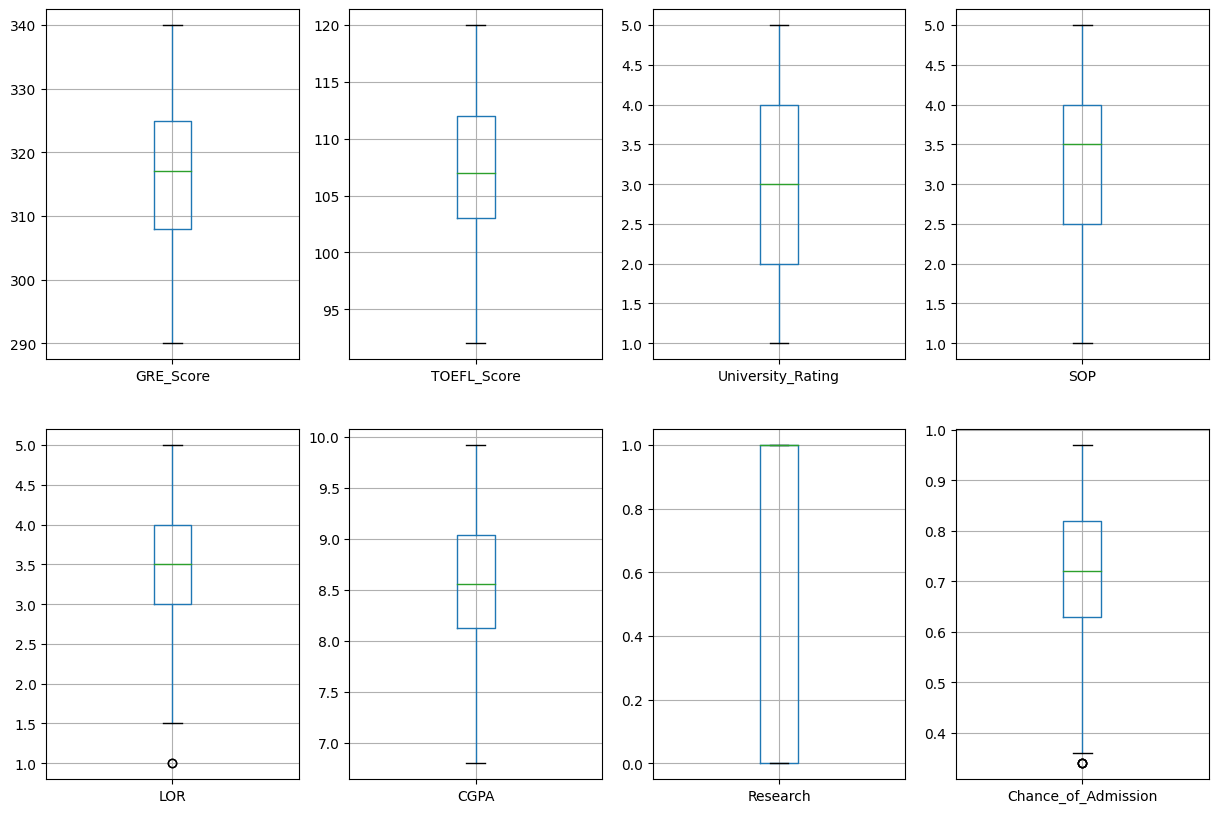

In [9]:
# Utilizamos diagramas de cajas y bigotes para verificar las variables que parecieron no tener sentido
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, start=1):
    plt.subplot(2, 4, i)
    df.boxplot(col)

Interpretación:

A partir del gráfico anterior, podemos inferir existe la presencia de datos atípicos en las variables LOR y Chance_of_Admission. Sin embargo, teniendo en cuenta el contexto de la información, existe la posibilidad de que un aspirante no cuente con una calificación destacada de su carta de recomendación o evidencia una posibilidad baja de admisión. Por tanto, no se consideran estos puntos como datos atípicos. 

In [10]:
print(df[df["LOR"] == 1.0])


     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
347        299           94                  1  1.0  1.0  7.34         0   
847        299           94                  1  1.0  1.0  7.34         0   

     Chance_of_Admission  
347                 0.42  
847                 0.42  


In [11]:
print(df[df["Chance_of_Admission"] == 0.34])

     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
92         298           98                  2  4.0  3.0  8.03         0   
376        297           96                  2  2.5  2.0  7.43         0   
592        298           98                  2  4.0  3.0  8.03         0   
876        297           96                  2  2.5  2.0  7.43         0   

     Chance_of_Admission  
92                  0.34  
376                 0.34  
592                 0.34  
876                 0.34  


Interpretación: 

Se encontraron solo 2 registros con valores mínimos de calificación para la carta de recomendación y solo 4 registros que evidencian las posibilidades o puntuacioens más bajas de admisión. 

Los pasos correspondientes al tratamiento de datos nulos no serán usados, debido a que no hay presencia de los mismos en nuestro dataset.

In [ ]:
'''# Creamos un Transformer personalizado que nos convierte a nulos los datos erróneos
class Nullify_variables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        mort_5_percentile = np.percentile(df.iloc[:,4].dropna(), 5)
        result.iloc[:,4] = result.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
        result.infant_deaths = result.infant_deaths.replace(0, np.nan)
        result.bmi = result.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
        result['under-five_deaths'] = result['under-five_deaths'].replace(0, np.nan)
        return result'''

In [ ]:
'''df_nulls = Nullify_variables().fit_transform(df_renamed)'''

In [ ]:
'''df_nulls.info()'''

In [ ]:
'''# Nos da un análisis pormenorizado de las variables con valores nulos explícitos
def nulls_breakdown(df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))'''

In [ ]:
'''nulls_breakdown(df_nulls)'''

In [ ]:
'''# Creamos un Transformer personalizado que nos elimina valores nulos
# Eliminamos los registros con valores faltantes en la variable objetivo
# Eliminamos la columna BMI
# Las otras columnas con valores faltantes las imputamos con la media por año
class Remove_null_values_mean(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns='bmi')
        imputed_data = []
        for year in list(result.year.unique()):
            year_data = result[result.year == year].copy()
            for col in list(year_data.columns)[3:]:
                year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
            imputed_data.append(year_data)
        result = pd.concat(imputed_data).copy()
        return result'''

In [ ]:
'''df_non_nulls_mean = Remove_null_values_mean().fit_transform(df_nulls)'''

In [ ]:
'''nulls_breakdown(df_non_nulls_mean)'''

In [ ]:
'''df_non_nulls_mean.info()'''

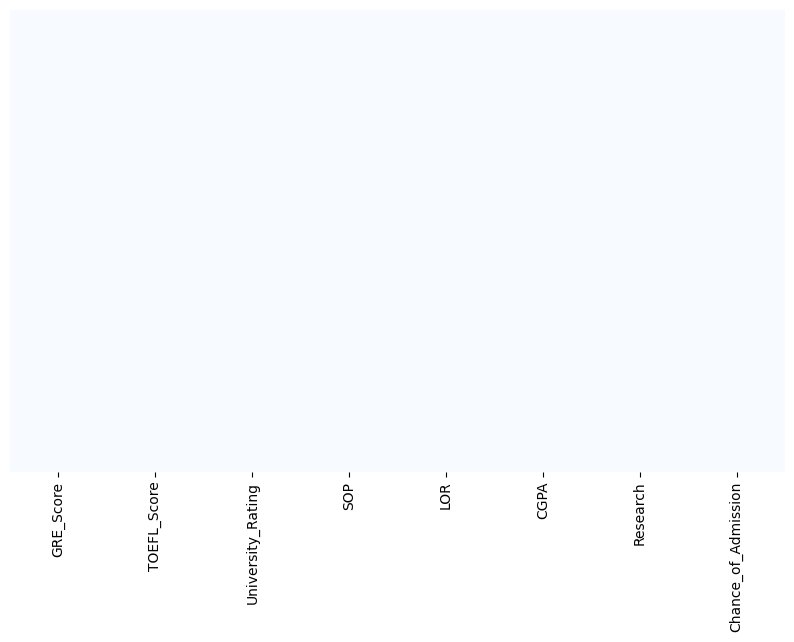

In [12]:
# Para revisar datos faltantes podemos dibujar un mapa de calor
# Nos permite encontrar la ubicación de dichos datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

No hay datos faltantes en este caso, por tanto no se utilizará las funciones que utilizan el método de KNN para imputación de datos faltantes.

In [ ]:
'''# Construimos una función que nos permite obtener el X y el y para el dataframe de Admissions

def obtain_X_y(df):
    return df.drop(columns=['']),df[['']]

# Segunda aproximación: utilizar knn para imputar los datos faltantes
# Utilizamos KNNImputer para completar los datos faltantes
# Para optimizar debemos encontrar el mejor k

from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error 

def optimize_k(df):
    result = df.copy()
    errors = []
    result = result.drop(columns='bmi')
    numeric_vars = result.select_dtypes('number').columns
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(result[numeric_vars])
        df_imputed = pd.DataFrame(imputed, columns=numeric_vars)
        
        X,y = obtain_X_y(df_imputed)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

        model = RandomForestRegressor(random_state=1234)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = np.sqrt(mean_squared_error(y_test, preds))
        errors.append({'K': k, 'RMSE': error, 'R^2': r2_score(y_test,preds)})
        
    return errors

errors = optimize_k(df_nulls)
print(errors)'''

In [ ]:
'''# Gráfica para encontrar el mejor k teniendo en cuenta el RMSE
 
ax = sns.lineplot(x=[errors[i]['K'] for i in range(len(errors))],y=[errors[i]['RMSE'] for i in range(len(errors))])
ax.set(title='RMSE vs K neighbors',xlim=(1,21),xlabel='K neighbors', ylabel='RMSE')
plt.show()'''

In [ ]:
'''# Gráfica para encontrar el mejor k teniendo en cuenta el R^2

ax = sns.lineplot(x=[errors[i]['K'] for i in range(len(errors))],y=[errors[i]['R^2'] for i in range(len(errors))])
ax.set(title='R^2 vs K neighbors',xlim=(1,21),xlabel='K neighbors', ylabel='R^2')
plt.show()'''

Ordenamos los resultados con base al mejor R^2 y el mejor RMSE

In [ ]:
'''# Verificamos el mejor K teniendo en cuenta el R^2 y el RMSE
res1 = sorted(errors,key=lambda x: x['R^2'],reverse=False)[0]
res2 = sorted(errors,key=lambda x: x['R^2'],reverse=True)[0]
print('K =',res1['K'],' R^2 = ',res1['R^2'],' RMSE = ',res1['RMSE'])
print('K =',res2['K'],' RMSE = ',res2['RMSE'],' R^2 = ',res2['R^2'])'''

In [ ]:
'''# Luego de reconocer a k=19 como el mejor número de vecinos más cercanos, 
# podemos imputar nuestros datos faltantes

# Creamos un Transformer personalizado para imputar con KNN
class KnnImputer(BaseEstimator, TransformerMixin):
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns='bmi')
        numeric_vars = result.select_dtypes('number').columns
        imputed = KNNImputer(n_neighbors=self.k).fit_transform(result[numeric_vars])
        df_imputed = pd.DataFrame(imputed, columns=numeric_vars)
        for col in X.select_dtypes('object'):
            df_imputed[col] = X[col]
        return df_imputed'''


In [ ]:
'''df_imputed_knn = KnnImputer(19).fit_transform(df_nulls)
df_imputed_knn'''

### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [13]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()

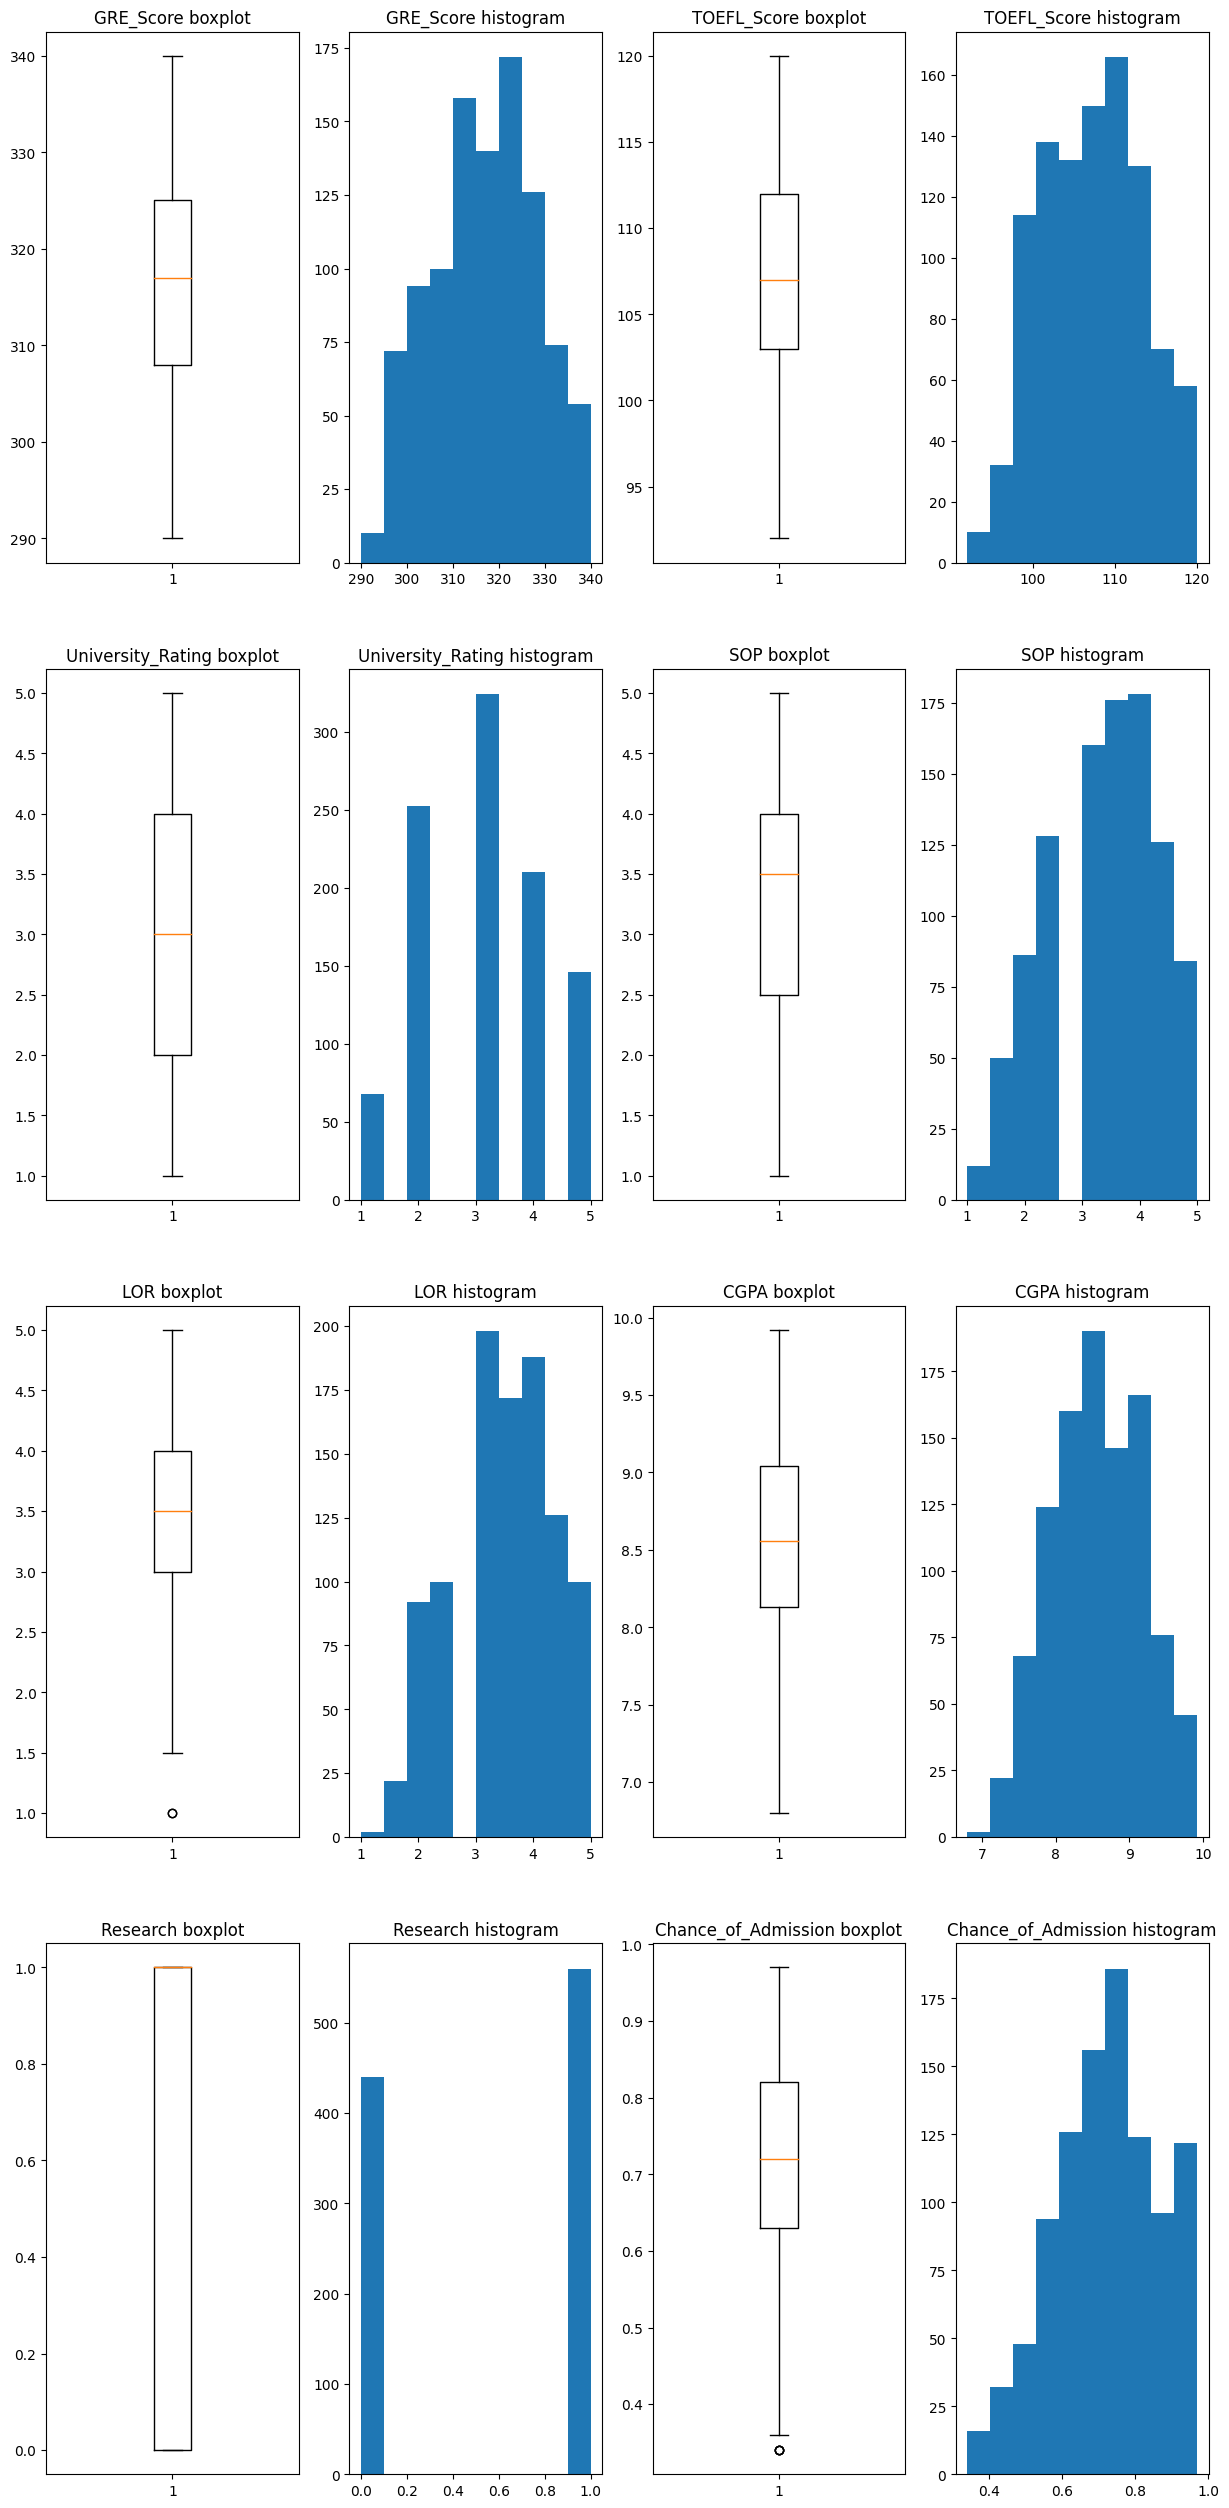

In [14]:
outliers_visual(df)

Como se mencionó anteriormente, teniendo en cuenta el contexto de la información, los datos atípicos no serán eliminados. Debido a que es normal, que algunos aspirantes exhiban un desempeño menos destacado en algunas de las características que promueven su admisión o su no admisión. 

Para efectos académicos, revisaremos la manera estadística de corrobararlos usando el método Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil).

In [15]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [16]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df.select_dtypes('number').columns):
    if outlier_count(col, df) > 0:
        cont_vars.append(col)

---------------GRE_Score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------TOEFL_Score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------University_Rating---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------SOP---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------LOR---------------
Number of outliers: 2
Percent of data that is outlier: 0.2%
---------------CGPA---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Research---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Chance_of_Admission---------------
Number of outliers: 4
Percent of data that is outlier: 0.4%


¿Qué hacer con tantos datos atípicos?
Existen varias opciones a considerar
- Eliminarlos (mejor evitar esta opción para mantener la mayor cantidad de información posible) - No se eliminarán
- Limitar los límites inferiores y superiores (winzorize) 
- Transformación de los datos (normalización)


Teniendo en cuenta los gráficos previos y los estadísticos, se puede ver que existen cantidades diferentes de outliers para cada variable y hacia diferentes direcciones. Es por esto que en este caso la mejor decisión es limitar a través de winsorizing

In [17]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

In [18]:
cont_vars

['LOR', 'Chance_of_Admission']

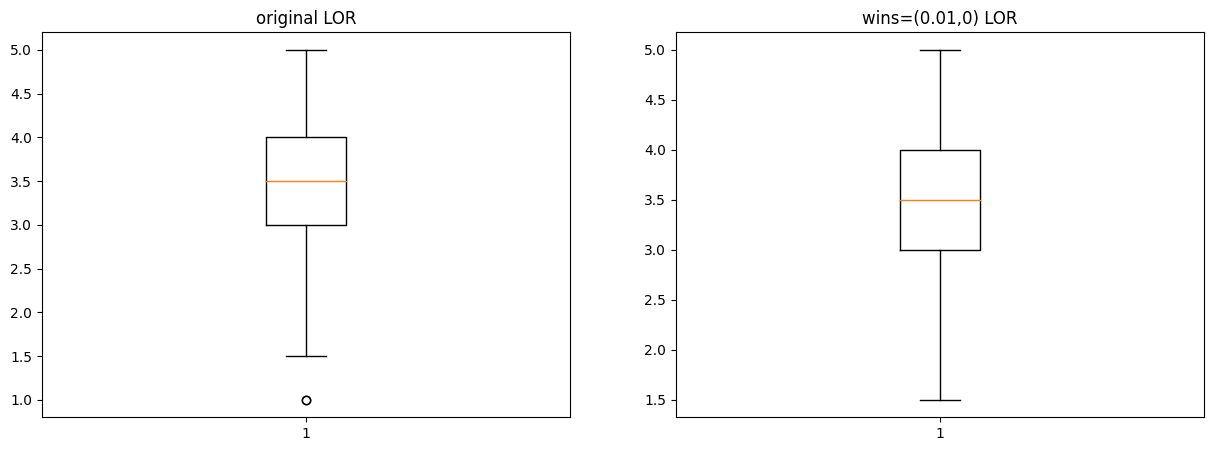

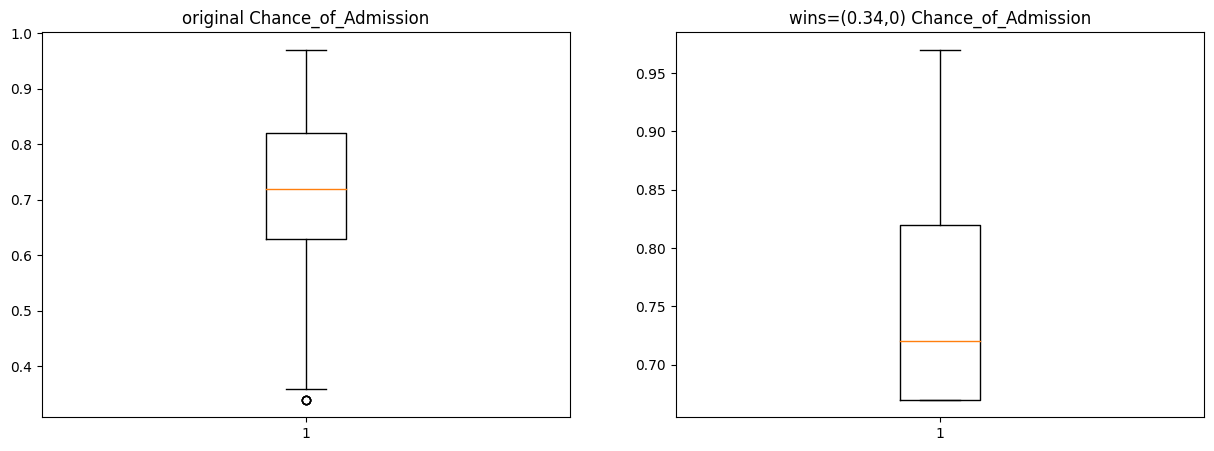

In [19]:
# Verificación de la winsorizing
wins_dict = {}
wins_dict = test_wins(cont_vars[0], df, wins_dict, lower_limit=.01, show_plot=True)
wins_dict = test_wins(cont_vars[1], df, wins_dict, lower_limit=.34, show_plot=True)





A través de los diagramas de cajas y bigotes se puede detallar como se logra mitigar el impacto de los outliers para cada una de las variables.

In [20]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Creamos un Transformer personalizado para limitar los outliers con el winsorizing


from sklearn.base import BaseEstimator, TransformerMixin

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        wins_df =pd.DataFrame(index = X.index)
        for col in ['LOR', 'Chance_of_Admission']:
            wins_df[col] = X[col]
        for col in self.cont_vars:
                wins_df[col] = self.wins[col]     
        return wins_df

In [22]:
df_wins_mean = Winsorizer(wins_dict,cont_vars).fit_transform(df)
df_wins_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOR                  1000 non-null   float64
 1   Chance_of_Admission  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


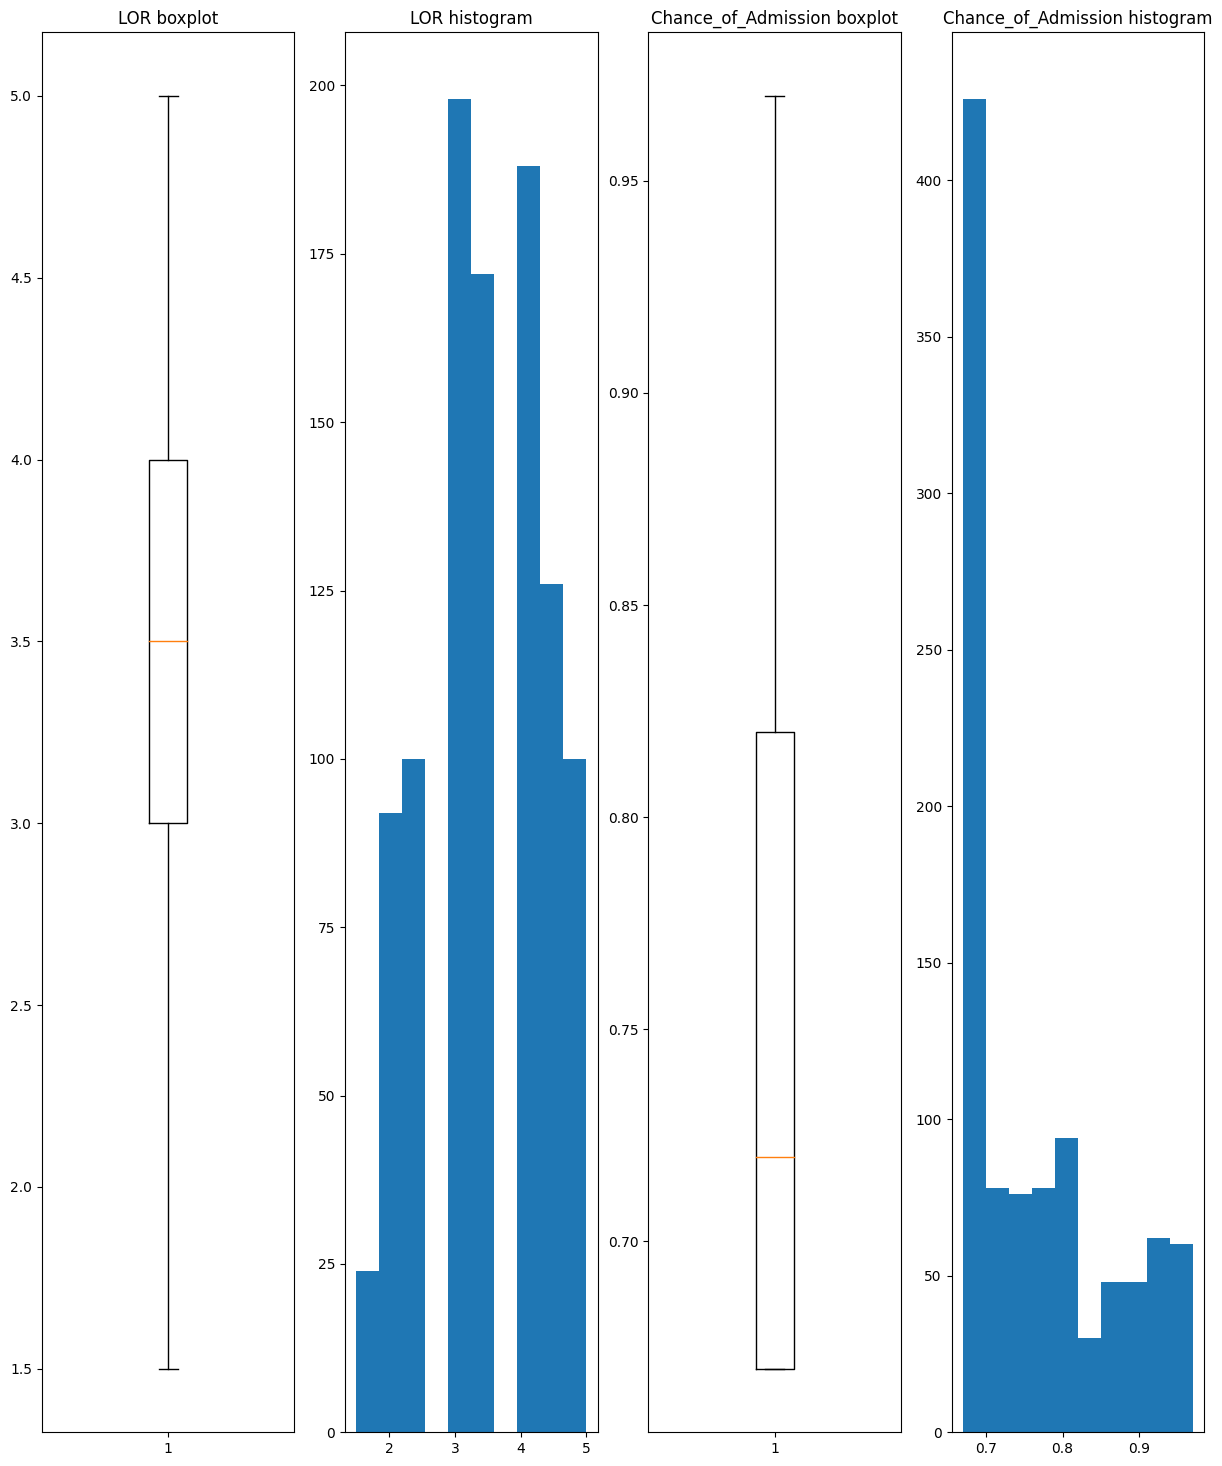

In [23]:
outliers_visual(df_wins_mean)

In [24]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars1 = []
for col in list(df_wins_mean.select_dtypes('number').columns):
    if outlier_count(col, df_wins_mean) > 0:
        cont_vars1.append(col)

---------------LOR---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Chance_of_Admission---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%


### 3.2. Exploración de datos
- Análisis univariado
    - Variables continuas
    - Variables categóricas
- Análisis Bivariado
    - Variables continuas comparadas con variable objetivo y entre sí
    - Variables categóricas con respecto a variable objetivo

### Análisis univariado

La idea con este este análisis es ver cada variable por sí sola. Generalmente se realiza con la ayuda de histogramas para variables continuas y countplots o barplot para datos categóricos. Además de incluir los reportes estadísticos que no deben faltar.

Vamos a revisar primero el dataframe con los datos imputados con la media

In [25]:
df['University_Rating'] = df['University_Rating'].astype('category')

In [26]:
# Descriptores estadísticos para valores continuos
df.describe()

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [27]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(15, 40))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

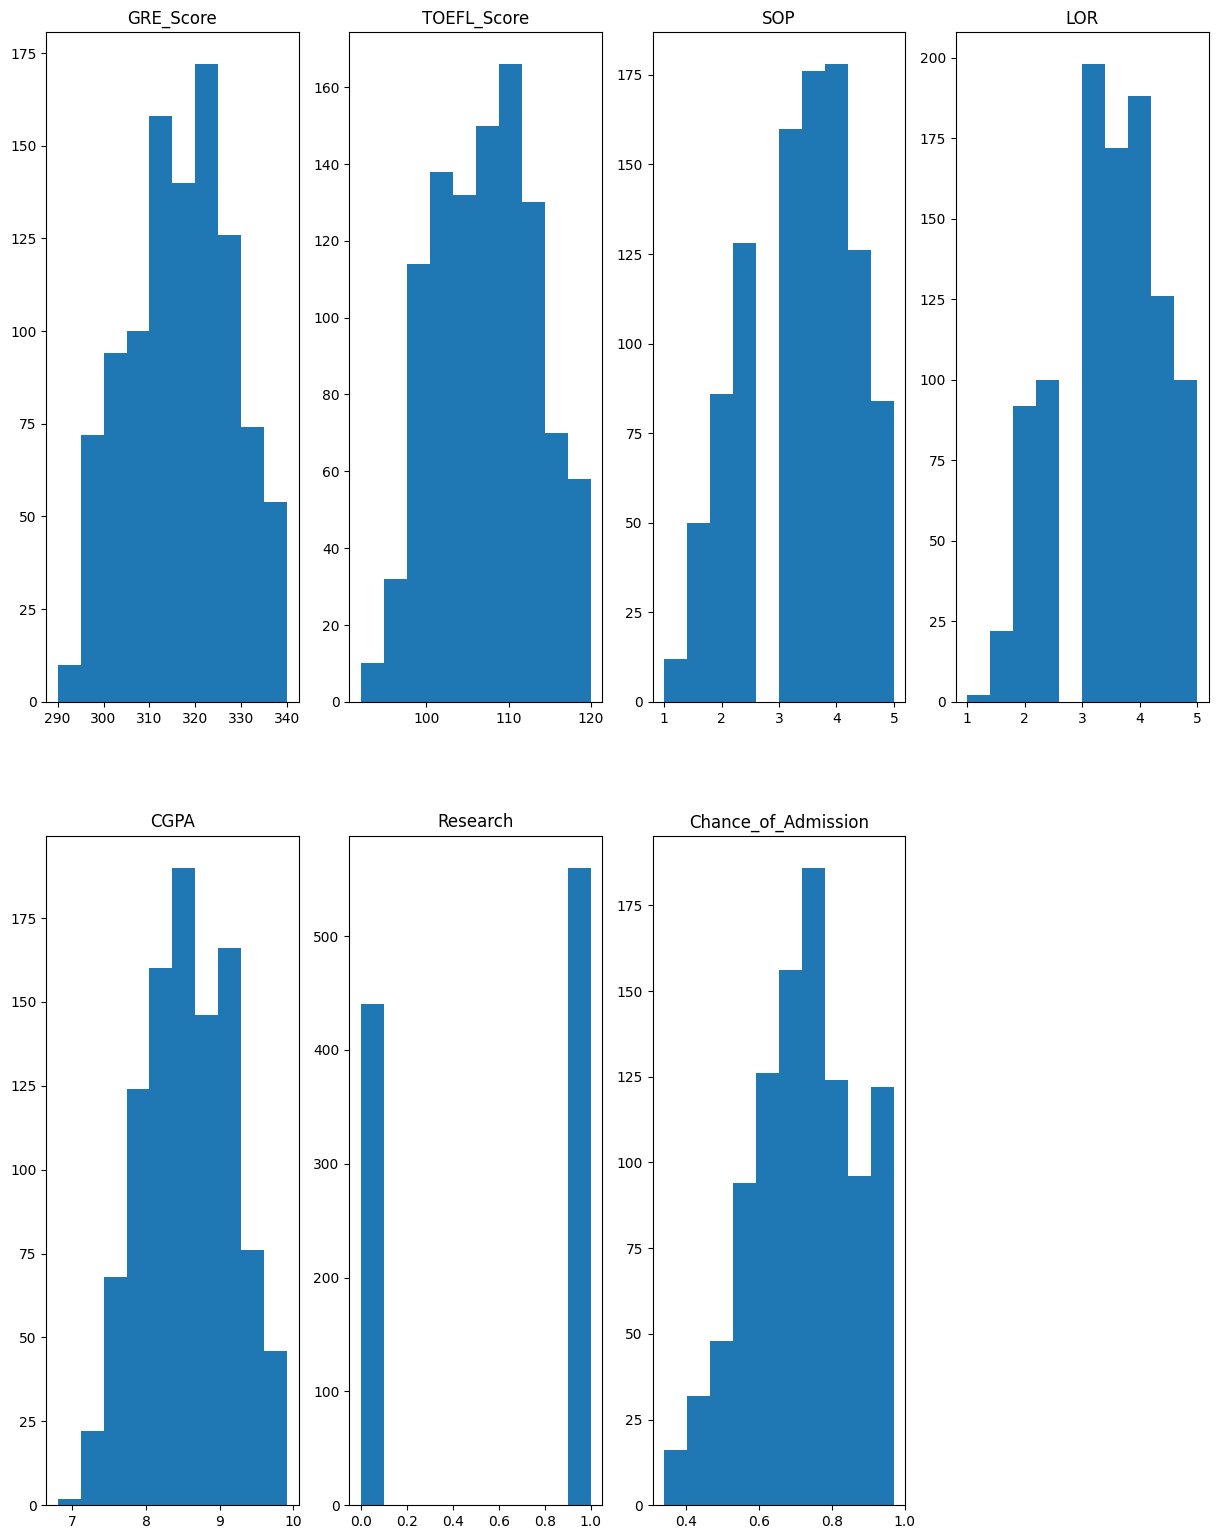

In [28]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(df)

In [33]:
# Función para visualizar registros por experiencia en investigación
def visualize_rows_by_research(df):
    plt.figure(figsize=(10, 10))
    df.Research.value_counts(ascending=True).plot(kind='barh')
    plt.title('Count of Rows by Resarch')
    plt.xlabel('Count of Rows')
    plt.ylabel('Research Experience')
    plt.tight_layout()
    plt.show()

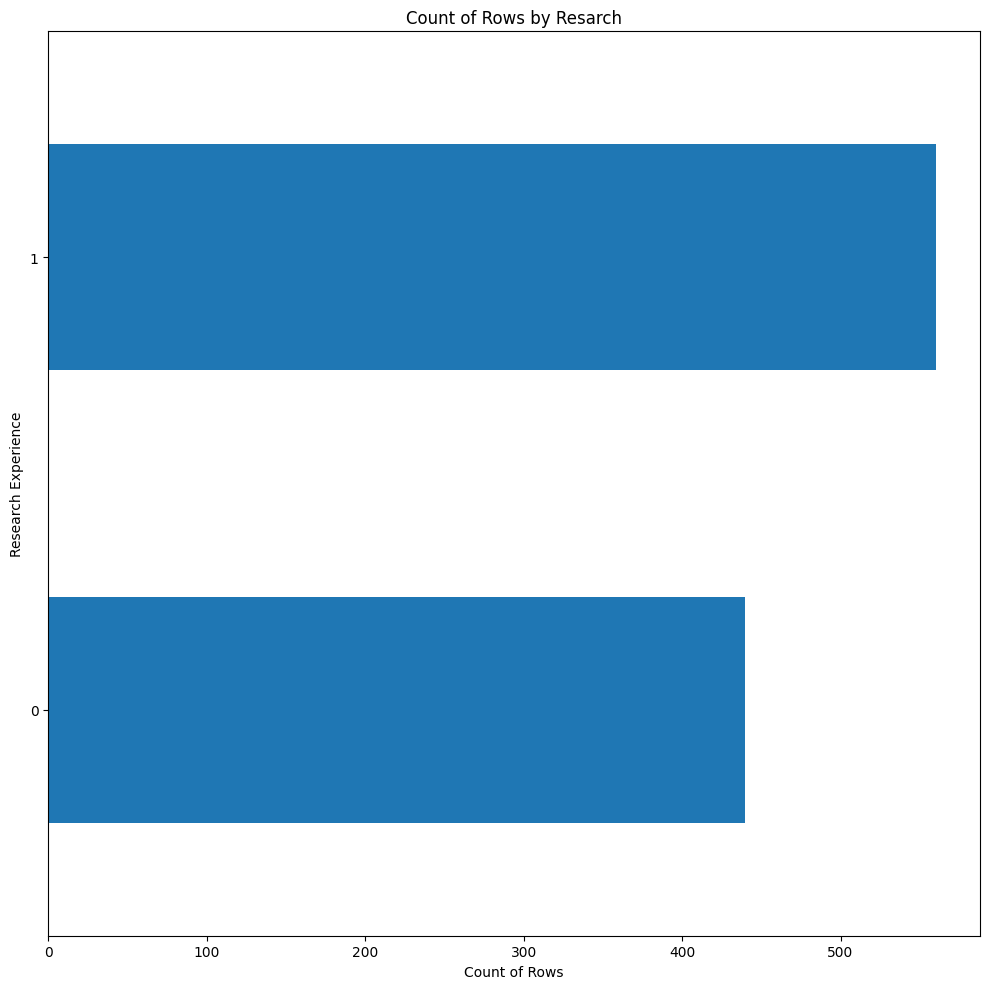

In [34]:
visualize_rows_by_research(df)

Aunque no resulta una gráfica muy amigable, se puede observar que la gran mayoría de países tienen 16 registros (16 años). Podemos notar que los países no están sobrerepresentados.

In [35]:
# Función para visualizar registros según calificación de la universidad
def visualize_rows_by_university_rating(df):
    df.University_Rating.value_counts().sort_index().plot(kind='barh')
    plt.title('Count of Rows by University Rating')
    plt.xlabel('Count of Rows')
    plt.ylabel('University Rating')
    plt.show()

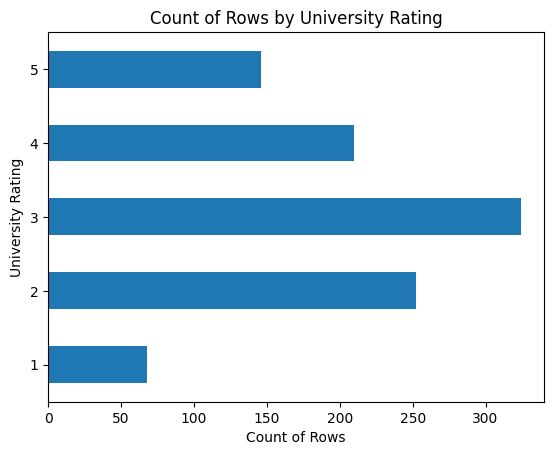

In [36]:
visualize_rows_by_university_rating(df)

Interpretación: 

Teniendo en cuenta el último gráfico, se encontró que la mayoría de los aplicantes se encuentran realizando procesos de admisión a universidades con calificación correspondiente a 3 puntos, seguido de aquellas que tienen calificación 2. Por su parte, se destaca que la mayoría de los estudiantes que están realizando procesos de admisión a las universidades exhibe o demuestra experiencia en investigación. 

In [46]:
def visualize_university_rating(df):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    df.University_Rating.value_counts().plot(kind='bar')
    plt.title('Count of Rows by University Rating')
    plt.xlabel('University Rating')
    plt.ylabel('Count of Rows')
    plt.xticks(rotation=0)

    plt.subplot(122)
    df.University_Rating.value_counts().plot(kind='pie', autopct='%.2f')
    plt.ylabel('')
    plt.title('University Rating Pie Chart')

    plt.show()

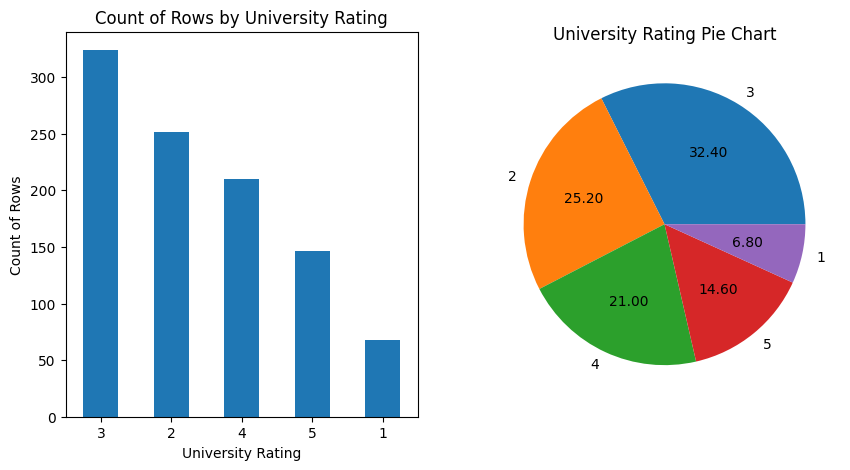

In [47]:
visualize_university_rating(df)

### Análisis Bivariado
Aspectos de relevancia a tener en cuenta:
- Variables continuas con respecto a Chance of Admission (independientes vs dependiente) y entre ellas
- Variables categóricas con respecto a Chance of Admission (independientes vs dependiente)
- Variables categóricas con respecto a continuas (Caso de Research vs las demás)

In [52]:
df["Research"]=df["Research"].astype('category')

In [53]:
# Matriz de correlación entre variables continuas
df[df.select_dtypes('number').columns].corr()

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Chance_of_Admission
GRE_Score,1.000000,0.827076,0.613498,0.524679,0.825878,0.810351
TOEFL_Score,0.827076,1.000000,0.644374,0.541340,0.810644,0.791921
SOP,0.613498,0.644374,1.000000,0.663707,0.712154,0.684137
LOR,0.524679,0.541340,0.663707,1.000000,0.637469,0.645365
CGPA,0.825878,0.810644,0.712154,0.637469,1.000000,0.882413
Chance_of_Admission,0.810351,0.791921,0.684137,0.645365,0.882413,1.000000


In [62]:
def correlation_matrix(df,y=True):
    if y:
        cont_vars = list(df.drop(['Research'],axis=1).select_dtypes('number').columns)
    else:
        cont_vars = list(df.select_dtypes('number').columns)
    mask = np.triu(df[cont_vars].corr())
    plt.figure(figsize=(15,15))
    sns.heatmap(df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(0.5, len(cont_vars) + 0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

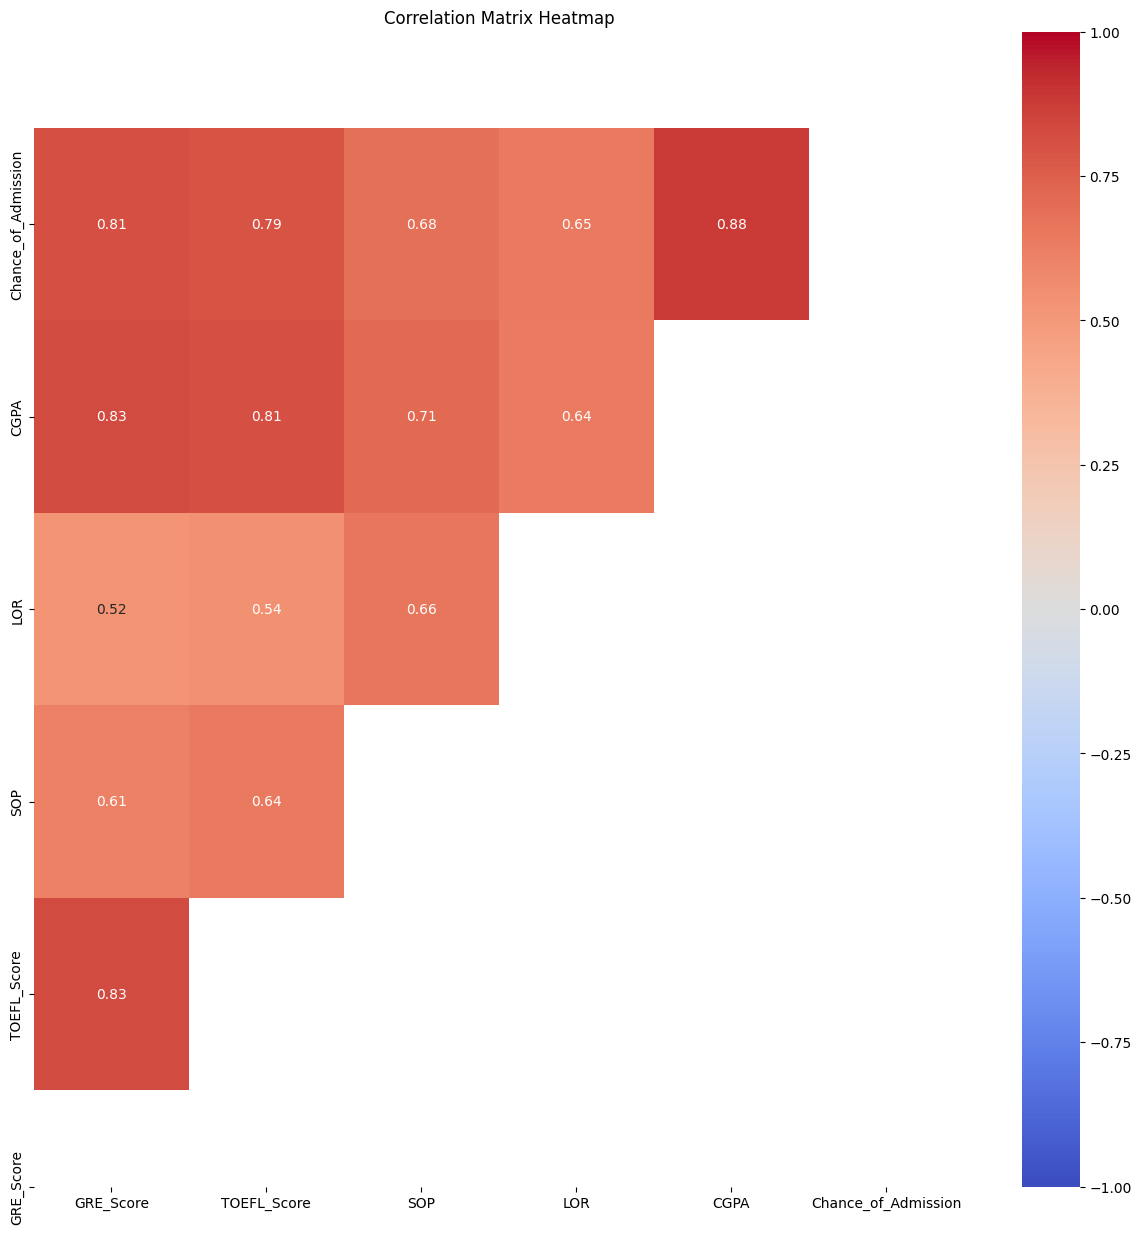

In [63]:
correlation_matrix(df)

Interpretación: 

- Se encontró una fuerte correlación entre GRE_SCORE y TOEFL_SCORE. También entre GRE_SCORE y CGPA. Esto cobra sentido, debido a que evidencia que si a un aspirante le va bien en alguna de las pruebas, eso estaría indicando un buen desempeño en las otras. 

- Con respecto a la variable objetivo, se encontraron fuertes correlaciones entre la mencionada y GRE_SCORE, TOEFL_SCORE y CGPA.  

Se debe evitar variables independientes altamente correlacionadas entre sí. Igualmente, las variables independientes altamente correlacionadas con la variable dependiente pueden resultar más importante a la hora de implementar los modelos



In [ ]:
'''def visualize_year_life_expectancy(df):
    sns.lineplot(data=df, x='year', y='life_expectancy', marker='o')
    plt.title('Life Expectancy by Year')
    plt.show()'''

In [ ]:
'''visualize_year_life_expectancy(df_wins_mean)'''

In [ ]:
'''df_wins_mean.year.corr(df_wins_mean.life_expectancy)'''

In [ ]:
'''from scipy import stats

def t_testing_years(df):
    years = list(df.year.unique())
    years.sort()
    yearly_le = {}
    for year in years:
        year_data = df[df.year == year].life_expectancy
        yearly_le[year] = year_data
    for year in years[:-1]:
        print(10*'-' + str(year) + ' to ' + str(year+1) + 10*'-')
        print(stats.ttest_ind(yearly_le[year], yearly_le[year+1], equal_var=False))'''

In [ ]:
'''t_testing_years(df_wins_mean)'''

In [ ]:
'''df_wins_mean.groupby('status').life_expectancy.agg(['mean'])'''

Analizamos si tener experiencia en investigación influye en la posibilidad de admisión. Para corroborar podemos utilizar un t-test<>

In [67]:
from scipy import stats


def t_testing_research(df):
    research_y = df[df.Research == '1'].Chance_of_Admission
    research_n = df[df.Research == '0'].Chance_of_Admission
    print(stats.ttest_ind(research_y, research_n, equal_var=False)) 

In [68]:
t_testing_research(df)

TtestResult(statistic=nan, pvalue=nan, df=nan)


A partir del p-value se puede corroborar que las diferencias son muy significativas. Lo cual nos indica que status puede resultar importante para la implementación de futuros modelos.

### 3.3. Ingeniería de características

Vamos a eliminar y/o crear nuevas características que nos resulten útiles para la futura implementación de nuestros modelos

In [ ]:
'''# Creamos un Transformer personalizado para dummificar la variable status y eliminar
# las variables year y country
class Dummify(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=['year','country'])
        result = pd.get_dummies(result,columns=['status'],dtype=float)
        return result'''

In [ ]:
'''df_wins_mean_dummified = Dummify().fit_transform(df_wins_mean)
df_wins_mean_dummified'''

In [ ]:
'''df_wins_knn_dummified = Dummify().fit_transform(df_wins_knn)
df_wins_knn_dummified'''

In [ ]:
'''# Creamos un Transformer personalizado para realizar la eliminación de variables
# a partir de sus correlaciones
#Se eliminan las variables que no están altamente correlacionadas con la variable objetivo
#Se eliminan las variables dependientes con alta correlación -> multicolinealidad
class Remove_highly_correlated_features(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=['infant_deaths', 'percentage_expenditure','polio',
                                      'thinness_10-19_years','schooling','status_Developing',
                                      'population'])
        return result'''

In [ ]:
'''df_wins_mean_dummified_removed = Remove_highly_correlated_features().fit_transform(df_wins_mean_dummified)
df_wins_knn_dummified'''

In [ ]:
'''correlation_matrix(df_wins_mean_dummified_removed,False)'''

Hacemos uso de un pipeline para dejar listos nuestros dataframes que posteriormente utilizaremos para entrenar nuestros modelos

In [ ]:
#Hay dos pipelines: imputación con la media e imputación con KNN

from sklearn.pipeline import Pipeline

pipe_mean_rem = Pipeline(steps = [('rename columns',Rename_columns()),
                   ('nullify values',Nullify_variables()),
                   ('remove null values mean',Remove_null_values_mean()),
                   ('winsorize values',Winsorizer(wins_dict,cont_vars)),
                   ('Dummify categorical variables',Dummify()),
                   ('Remove highly correlated features',Remove_highly_correlated_features())])

pipe_knn_rem = Pipeline(steps = [('rename columns',Rename_columns()),
                   ('nullify values',Nullify_variables()),
                   ('remove null values mean',KnnImputer(19)),
                   ('winsorize values',Winsorizer(wins_dict,cont_vars)),
                   ('Dummify categorical variables',Dummify()),
                   ('Remove highly correlated features',Remove_highly_correlated_features())])


df_pipeline_mean_rem = pipe_mean_rem.fit_transform(df)
df_pipeline_knn_rem = pipe_knn_rem.fit_transform(df)


### 4. Protocolos de evaluación

In [70]:
# Con nuestra primera aproximación (imputación con la media)
# Eliminación de variables altamente correlacionadas
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento
#Tenemos datos imputados por la media, datos imputados por KNN y los de Feature Selection

from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()


X['mean_rem'], y['mean_rem'] = obtain_X_y(df_pipeline_mean_rem)

X_train['mean_rem'], X_test['mean_rem'], y_train['mean_rem'], y_test['mean_rem'] = train_test_split(X['mean_rem'],y['mean_rem'],random_state=1234,test_size=0.3)
print(X_train['mean_rem'].shape)
print(X_test['mean_rem'].shape)
print(y_train['mean_rem'].shape)
print(y_test['mean_rem'].shape)

NameError: name 'obtain_X_y' is not defined

In [ ]:
# Con nuestra segunda aproximación (imputación con knn con k=19)
# Eliminando variables altamente correlacionadas

X['knn_rem'], y['knn_rem'] = obtain_X_y(df_pipeline_knn_rem)

X_train['knn_rem'], X_test['knn_rem'], y_train['knn_rem'], y_test['knn_rem'] = train_test_split(X['knn_rem'],y['knn_rem'],random_state=1234,test_size=0.3)

### 5. Métricas de evaluación

In [ ]:
#Este método cálcula las métricas tanto para entrenamiento como para prueba. 


# Implementamos una función que nos permita calcular las métricas de regresión para el conjunto 
# de entrenamiento y de prueba
# R2, R2 Ajustado MAE, MAPE, MSE, RMSE
# El coeficiente de determinación se puede ver como la varianza total explicada por el modelo, 
# es decir la proporción de la varianza en la variable dependiente que se puede predecir a partir de 
# las variables independientes
# Nos retorna el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de
# entrenamiento y el de prueba

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    metrics = {"Training R^2": r2_train,
               "Test R^2": r2_test,
               "Training Adj R^2": adj_r2_train,
               "Test Adj R^2": adj_r2_test,
               "Training MAE": mean_absolute_error(y_train,y_pred_train),
               "Test MAE": mean_absolute_error(y_test,y_pred_test),
               "Training MAPE": mean_absolute_percentage_error(y_train,y_pred_train),
               "Test MAPE": mean_absolute_percentage_error(y_test,y_pred_test),
               "Training RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
               "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))    
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics
    
def r2_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    return r2_train, r2_test, adj_r2_train, adj_r2_test


## 6. Implementación de modelos

### 6.1. Baseline
Como punto de partida para poder comparar cualquier modelo de regresión que pensemos implementar, debemos establecer un baseline. Al estar tratando con una tarea de regresión, hacemos uso de un Dummy regressor con estrategía de la media.

In [ ]:
# Establecemos el baseline a partir de un dummy regressor.
#El baseline es el punto de referencia para saber con la implementación de los modelos cómo vamos mejorando.

from sklearn.dummy import DummyRegressor

print('Using a dataframe imputed with the mean and with highly correlated variables removed')
regression_metrics(DummyRegressor(strategy='mean'),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()
print('Using a dataframe imputed with knn and with highly correlated variables removed')
regression_metrics(DummyRegressor(strategy='mean'),X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])


Por supuesto podemos observar que los resultados no son buenos con este regresor.

### 6.2. Modelo de K vecinos más cercanos
Un algoritmo simple pero bastante útil que nos sirve para resolver tanto tareas de clasificación como de regresión. 

- Es fácil de entender e implementar
- No hace suposiciones sobre la distribución de los datos.


Procederemos utilizando nuestros dataframes resultado de las etapas previas del proceso de analítica de datos.

Iniciamos con el dataframe imputado con la media y en el que eliminamos aquellas variables que se encontraban altamente correlacionadas entre sí (para evitar problemas de multicolinealidad)

In [ ]:
# Utilizamos knn
# Con el dataset imputado con la media y eliminando las variables 
# altamente correlacionadas
# Utilizamos el Knn regressor con sus parámetros por defecto

from sklearn.neighbors import KNeighborsRegressor

knnReg = KNeighborsRegressor()
regression_metrics(knnReg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Observamos que knn no nos brinda un tan buen resultado. Evidentemente no es porque este sea un mal modelo, el problema es que este modelo se basa en distancias y si las escalas de las variables son diferentes, las decisiones del modelo estarán inapropiadamente dominadas por aquellas con mayor escala.

Por ello podemos normalizar o estandarizar los datos y verificar los resultados nuevamente.

Se debe tener en cuenta las diferencias en los procesos de escalamiento:
- Normalizar: las observaciones se cambian y reescalan de manera que terminen en un rango entre 0 y 1. También se le conoce como escalamiento min-max X_new = (X_ — X_min)/(X_max — X_min). No maneja muy bien los datos atípicos
- Estandarizar: es el proceso de poner distintas variables en la misma escala. Para cada observación de la variable se le substrae la media y se divide por la desviación estándar. La estandarización asume que los datos siguen una distribución normal. En este caso el resultado tienen sentido pues estamos utilizando un modelo no paramétrico, no lineal

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor())
regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsRegressor())
regression_metrics(knnReg_norm,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Analizando los resultados podemos observar que en ambos casos, al utilizar procesos de escalamiento, se mejoran los resultados.

Ahora buscamos el mejor valor de k (único hiperparámetro de este modelo)

In [ ]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización y el regresor knn 
#Se hace a través de heurísticas o de forma gráfica, debido a que el único hiperparametro es K 

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
    print()


In [ ]:
# Visualizamos el R^2

results = [r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Modelo de K vecinos más cercanos con k=9, datos imputados con la media y eliminando variables altamente correlacionadas.

Hacemos uso de pickle para guardar tanto el modelo ya entrenado como el resultado de las métricas de manera que al finalizar podamos comparar entre todos los modelos implementados y elegir el que presente mejores resultados en cuanto a las métricas más importantes sobre tareas de regresión

In [ ]:
#Recuerde que el Regression Metrics guarda el modelo y las métricas

import pickle
# Guardamos el mejor modelo utilizando k=9 con todas las variables independientes e imputación con la media

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=9)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorImpMeanRem.pkl','wb')) #Modelo lo va a guardar en esta carpeta
pickle.dump(metrics, open('metrics/KnnRegressorImpMeanRemMetrics.pkl','wb')) #Modelo lo va a gurdar en una carpeta

### Selección de características

Aunque previamente, en la etapa de ingeniería de características habíamos creado nuevas variables y eliminado otras, en esta etapa verificaremos la importancia de las variables independientes con respecto a la objetivo utilizando distintos métodos. 

Esto con el fin de hallar el mejor grupo de variables que sirvan como insumo para nuestros modelos.

In [ ]:
# Utilizamos un método para extracción recursiva de características utilizando validación cruzada
# Con este método obtenemos las variables independientes más importantes dentro del dataframe 
#Modelo de random forest con 100 arboles y 5 cross validation (feature selection)

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train['mean_rem'], y_train['mean_rem'])
 
print("Ranking de características", selector.ranking_)

Utilizamos el método SelectKBest que nos permite seleccionar las  K mejores características utilizando como función de puntaje el f-regression.

El f-regression realiza una prueba estadística F entre cada característica y el target en un problema de regresión. (las independientes están influenciando a la variable objetivo) 

Calcula la relación entre cada característica independiente y la variable dependiente.

La prueba F compara el modelo de regresión que incluye una característica con un modelo que no la incluye.

Devuelve dos valores: la estadística F y el valor p correspondiente para cada característica. Un valor más alto de la estadística F indica una relación más fuerte entre la característica y la variable objetivo. Un valor p bajo indica que es poco probable que la característica no tenga una relación con la variable objetivo, es decir, la característica es relevante.

Graficamos con respecto al R^2 para observar cuál es el número de variables a seleccionar que nos presentan un mejor resultado.

Iteramos de 1 al número máximo de variables (en este caso 12)

In [ ]:
#FEATURE SELECTION


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

results = [r2_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=i),
                                                 StandardScaler(), #Estandarizo
                                                 KNeighborsRegressor(n_neighbors=9)), #Entreno el modelo con 9 vecinos
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,13)]
ax = sns.lineplot(x=range(1,13),
             y=results)
ax.set(title="R^2 vs K selected features",ylabel='R^2',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,13))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

#EL número optimo de variables es 5, porque refleja el mayor R2. (Recuerdo, ya hemos eliminado las variables que no aportan, aquí después de eso, estamos seleccionando las mejores)

Guardamos el mejor modelo y sus métricas. (Haremos un paso adicional con k igual a 5). Acá mejora el R2 que habíamos encontrado antes.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Guardamos el mejor modelo utilizando k=9 con feature selection (con 5 elegidas), 
# imputación con la media y eliminación de variables altamente correlacionadas

model,metrics = regression_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=5),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=9)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpMeanRemMetrics.pkl','wb'))

Ahora trabajamos con el segundo dataframe, en el que los datos se imputaron con knn con k=19 y se eliminaron las variables altamente correlacionadas entre sí

In [ ]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización y el regresor knn 

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
    print()

In [ ]:
# Visualizamos el R^2 (para ver cuál es la mejor cantidad de vecinos)

results = [r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [ ]:
model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=7)),
                                   X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/KnnRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorImpKnnRemMetrics.pkl','wb'))

In [ ]:
estimator = RandomForestRegressor(n_estimators=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train['knn_rem'], y_train['knn_rem'])
 
print("Ranking de características", selector.ranking_)

In [ ]:
#Select k best (mejores features) con el número de vecinos óptimo

results = [r2_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=i),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=7)),
            X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])[1] for i in range(1,13)]
ax = sns.lineplot(x=range(1,13),
             y=results)
ax.set(title="R^2 vs K selected features",ylabel='R^2',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,13))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Modelo de K vecinos más cercanos con k=5, feature selection y datos imputados con knn

In [ ]:
# Guardamos el mejor modelo utilizando k=7 con feature selection (con 5 elegidas), 
# imputación con knn y eliminación de variables altamente correlacionadas

model,metrics = regression_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=5),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=7)),
                                   X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/KnnRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpKnnRemMetrics.pkl','wb'))

### 6.3. Modelo de árbol de regresión

In [ ]:
# Utilizamos un árbol de regresión
# Verificamos sus métricas

from sklearn.tree import DecisionTreeRegressor, plot_tree

regression_metrics(DecisionTreeRegressor(random_state=1234),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

tree_reg = DecisionTreeRegressor(random_state=1234).fit(X_train['mean_rem'],y_train['mean_rem'])

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(20,20))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos imputados con la media y variables altamente correlacionadas entre sí eliminadas

In [ ]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de regresión
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo
# Tiempo de ejecución aprox: 12s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] } #Solo se usaron 4 hiperparametros y pocos valores por temas de tiempo

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

In [ ]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

In [ ]:
# El R^2 del mejor modelo

tuning_model.best_score_

Modelo de árbol de regresión con datos imputados con la media y variables altamente correlacionadas entre sí eliminadas

In [ ]:
# El mejor modelo de árbol de regresión
# Con todas datos imputados con la media y eliminación de variables altamente correlacionadas

tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorImpMeanrem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpMeanRemMetrics.pkl','wb'))


In [ ]:
# La visualización del mejor árbol

tree_reg.fit(X_train['mean_rem'],y_train['mean_rem'])
plt.figure(figsize=(40,40))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)


#NOTA PROFESOR: se pueden utilizar las características que particiona el árbol para hacer una especie de feature importance

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection, datos imputados con la media y eliminación de variables altamente correlacionadas entre sí

In [ ]:
# Tiempo de ejecución aprox: 10s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_t = SelectKBest(score_func=f_regression, k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])                                 

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de árbol de regresión con feature selection, datos imputados con la media y eliminación de variables altamente correlacionadas entre sí.

In [ ]:

pipe_dt = make_pipeline(SelectKBest(score_func=f_regression, k=5),
              DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'))

model,metrics = regression_metrics(pipe_dt,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpMeanRemMetrics.pkl','wb'))

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con datos imputados con knn y eliminación de variables altamente correlacionadas entre sí

In [ ]:
# Tiempo de ejecución aprox: 9s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de árbol de regresión con datos imputados con knn y eliminación de variables altamente correlacionadas entre sí.

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=11,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=3,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpKnnRemMetrics.pkl','wb'))

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 10s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_t = SelectKBest(score_func=f_regression, k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])                                 

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de árbol de regresión con feature selection y datos imputados con knn

In [ ]:
pipe_dt = make_pipeline(SelectKBest(score_func=f_regression, k=5),
              DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'))

model,metrics = regression_metrics(pipe_dt,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpKnnRemMetrics.pkl','wb'))

### 6.4. Modelo de Random Forest

Empezamos trabajando con los datos imputados con la media

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1234)

regression_metrics(rf,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

rf.fit(X_train['mean_rem'],y_train['mean_rem'])
print(rf.get_params())

Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto con datos imputados con la media y eliminación de variables

In [ ]:
# Tiempo de ejecución aprox: 4m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Random Forest con datos imputados con la media y eliminación de variables

In [ ]:
# El mejor modelo de Random Forest
# Con imputación con la media y elimnación de variables

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/RandomForestRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpMeanRemMetrics.pkl','wb'))


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con la media

In [ ]:
# Tiempo de ejecución aprox: 2m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])



In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Random Forest con feature selection y datos imputados con la media

In [ ]:
# Con feature selection e imputación con la media

pipe_rf = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400))

model,metrics = regression_metrics(pipe_rf,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpMeanRemMetrics.pkl','wb'))


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto con datos imputados con knn y elimnación de variables

In [ ]:
# Tiempo de ejecución aprox: 4m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Guardamos el mejor modelo

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpKnnRemMetrics.pkl','wb'))

Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 2m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])
tuning_model.fit(X_t,y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Random Forest con feature selection y datos imputados con knn

In [ ]:
# Con feature selection e imputación con knn


pipe_rf = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=200))

model,metrics = regression_metrics(pipe_rf,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpKnnRemMetrics.pkl','wb'))

### 6.5. Modelo de Gradient Boosting

In [ ]:
# Datos imputados con la media

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=1234)

regression_metrics(gb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

gb.fit(X_train['mean_rem'],y_train['mean_rem'])
print(gb.get_params())

Búsqueda del mejor modelo para Gradient Boosting con GridSearchCV
- Conjunto de datos imputados con la media

In [ ]:
# Tiempo de ejecución aprox: 6m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Gradient Boosting con datos imputados con la media

In [ ]:
# Con todas las variables e imputación con la media

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpMeanRemMetrics.pkl','wb'))

Modelo de Gradient Boosting con feature selection y datos imputados con la media

In [ ]:
# Tiempo de ejecución aprox: 3m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con feature selection e imputación con la media

pipe_gb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=500,
                                         subsample=0.5))

model,metrics = regression_metrics(pipe_gb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpMeanRemMetrics.pkl','wb'))

Modelo de Gradient Boosting con datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 9m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con imputación con knn

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpKnnRemMetrics.pkl','wb'))

Modelo de Gradient Boosting con feature selection y datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 5m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem']) 

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con feature selection e imputación con knn

pipe_gb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=500,
                                         subsample=0.5))

model,metrics = regression_metrics(pipe_gb,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpKnnRemMetrics.pkl','wb'))

### Modelo de XGBoosting

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=1234)
regression_metrics(model,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Búsqueda del mejor modelo para XGBoosting con GridSearchCV
- Conjunto de datos con datos imputados con la media

In [ ]:
# Tiempo de ejecución aprox: 28m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de XGBoosting con datos imputados con la media

In [ ]:
# Con todas las variables e imputación con la media

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/XGBoostingRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpMeanRemMetrics.pkl','wb'))

Modelo de XGBoosting con feature selection y datos imputados con la media

In [ ]:
# Tiempo de ejecución aprox: 30m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con feature selection e imputación con la media

pipe_xgb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=500,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5))
model,metrics = regression_metrics(pipe_xgb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/XGBoostingRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpMeanRemMetrics.pkl','wb'))

Modelo de XGBoosting con datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 65m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con imputación con knn

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=5,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/XGBoostingRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpKnnRemMetrics.pkl','wb'))

Modelo de XGBoosting con feature selection y datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 34m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con feature selection e imputación con knn

pipe_xgb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5))
model,metrics = regression_metrics(pipe_xgb,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/XGBoostingRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpKnnRemMetrics.pkl','wb'))

### Comparación de los distintos modelos

Cargamos las métricas de los modelos previamente guardados 

In [ ]:
metrics = list()
names = list()
metrics.append(pickle.load(open('metrics/KnnRegressorImpMeanRemMetrics.pkl','rb')))
names.append('KnnRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('KnnRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorImpKnnRemMetrics.pkl','rb')))
names.append('KnnRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('KnnRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpMeanRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpKnnRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpMeanRemMetrics.pkl','rb')))
names.append('RandomForestRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpKnnRemMetrics.pkl','rb')))
names.append('RandomForestRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpMeanRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpKnnRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpMeanRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpKnnRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpKnnRemMetrics')

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test R^2'] for i in metrics])
ax.set(title='R^2 de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 ajustado de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Adj R^2'] for i in metrics])
ax.set(title='R^2 ajustado de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAE'] for i in metrics])
ax.set(title='MAE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAPE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAPE'] for i in metrics])
ax.set(title='MAPE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al RMSE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test RMSE'] for i in metrics])
ax.set(title='RMSE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test R^2':model[1]['Test R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 ajustado de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Adj R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Adj R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test Adj R^2':model[1]['Test Adj R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su RMSE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test RMSE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test RMSE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test RMSE':model[1]['Test RMSE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test MAE':model[1]['Test MAE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAPE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAPE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAPE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test MAPE':model[1]['Test MAPE']},ignore_index=True)
ranking